In [1]:
from __future__ import annotations

import pickle
import os
import numpy as np
from qtpyt.base.selfenergy import DataSelfEnergy as BaseDataSelfEnergy
from qtpyt.block_tridiag import greenfunction
import matplotlib.pyplot as plt
from qtpyt.projector import expand

from matplotlib.colors import ListedColormap

new_path = '/capstor/scratch/cscs/ajayaraj/qtpyt-tests/pentadienyl/production_run/non_block_triadiagonal'
os.chdir(new_path)

/users/ajayaraj/miniconda3/envs/qtpyt/lib/python3.9/site-packages/numba/cpython/hashing.py:524: UserWarning: FNV hashing is not implemented in Numba. See PEP 456 https://www.python.org/dev/peps/pep-0456/ for rationale over not using FNV. Numba will continue to work, but hashes for built in types will be computed using siphash24. This will permit e.g. dictionaries to continue to behave as expected, however anything relying on the value of the hash opposed to hash as a derived property is likely to not work as expected.
  warnings.warn(msg)


In [ ]:
class DataSelfEnergy(BaseDataSelfEnergy):
    """Wrapper"""

    def retarded(self, energy):
        return expand(S_molecule_identity, super().retarded(energy), idx_molecule)


def load(filename):
    return DataSelfEnergy(energies, np.load(filename))


: 

In [2]:
data_folder = "../output/lowdin"
ed_data_folder = "../output/lowdin/ed"
index_active_region = np.load(f"{data_folder}/index_active_region.npy")
self_energy = np.load(f"{data_folder}/self_energy.npy", allow_pickle=True)
ed_self_energy_file = f"{ed_data_folder}/self_energy_with_dcc.npy"

# de = 0.01
# energies = np.arange(0.0, 0.01 + de / 2.0, de).round(7)
# eta = 1e-2

# with open(f"{data_folder}/hs_list_ii.pkl", "rb") as f:
#     hs_list_ii = pickle.load(f)
# with open(f"{data_folder}/hs_list_ij.pkl", "rb") as f:
#     hs_list_ij = pickle.load(f)

# nodes = np.load(f"{data_folder}/nodes.npy")

: 

: 

: 

In [ ]:
gf = greenfunction.GreenFunction(
    hs_list_ii,
    hs_list_ij,
    [(0, self_energy[0]), (len(hs_list_ii) - 1, self_energy[1])],
    solver="dyson",
    eta=eta,
)

ed_sigma = load(ed_self_energy_file)

In [ ]:
imb = 2  # index of molecule block from the nodes list
S_molecule = hs_list_ii[imb][1]  # overlap of molecule
S_molecule_identity = np.eye(S_molecule.shape[0])
idx_molecule = (
    index_active_region - nodes[imb]
)  # indices of active region w.r.t molecule

self_energy[2] = ed_sigma
gf.selfenergies.append((imb, self_energy[2]))

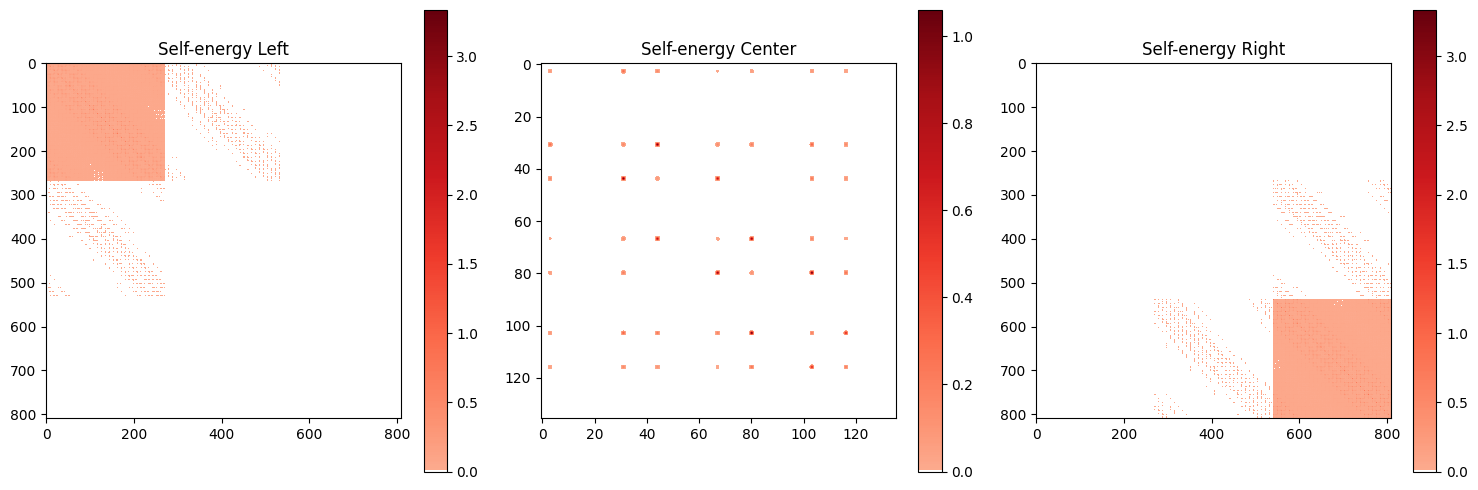

In [ ]:
for e in energies:
    se = np.abs(self_energy[2].retarded(e))
    se_l = np.abs(self_energy[0].retarded(e))
    se_r = np.abs(self_energy[1].retarded(e))

matrices = [np.real(se_l), np.real(se), np.real(se_r)]
titles = ['Self-energy Left', 'Self-energy Center', 'Self-energy Right']

maroon_cmap = plt.get_cmap('Reds')
colors = maroon_cmap(np.linspace(0.3, 1, 256))
colors[0] = [1, 1, 1, 1]
custom_cmap = ListedColormap(colors)

fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for ax, mat, title in zip(axes, matrices, titles):
    mask = (mat == 0)
    mat_plot = mat.copy()
    mat_plot[mask] = mat.min()
    im = ax.imshow(mat_plot, cmap=custom_cmap)
    ax.set_title(title)
    fig.colorbar(im, ax=ax)
plt.tight_layout()
plt.show()

In [ ]:
non_zero_elements = se[se != 0]

# Print them
print("Non-zero elements:")
print(non_zero_elements)

non_zero_indices = np.argwhere(se != 0)

# Convert to list of tuples
non_zero_locations = [tuple(idx) for idx in non_zero_indices]

# Print them
print("Non-zero element locations:")
print(non_zero_locations)

Non-zero elements:
[0.08009292 0.302712   0.16345877 0.00911582 0.05758516 0.09128806
 0.04252721 0.302712   0.17324246 0.99664055 0.14829363 0.21262603
 0.34183092 0.1597551  0.16345877 0.99664055 0.09871567 0.75572741
 0.00115642 0.24027027 0.10910365 0.00911582 0.14829363 0.75572741
 0.02823246 0.91426289 0.18438095 0.02028889 0.05758516 0.21262603
 0.00115642 0.91426289 0.11858797 1.05999697 0.26184517 0.09128806
 0.34183092 0.24027027 0.18438095 1.05999697 0.1987851  0.59004208
 0.04252721 0.1597551  0.10910365 0.02028889 0.26184517 0.59004208
 0.20177752]
Non-zero element locations:
[(3, 3), (3, 31), (3, 44), (3, 67), (3, 80), (3, 103), (3, 116), (31, 3), (31, 31), (31, 44), (31, 67), (31, 80), (31, 103), (31, 116), (44, 3), (44, 31), (44, 44), (44, 67), (44, 80), (44, 103), (44, 116), (67, 3), (67, 31), (67, 44), (67, 67), (67, 80), (67, 103), (67, 116), (80, 3), (80, 31), (80, 44), (80, 67), (80, 80), (80, 103), (80, 116), (103, 3), (103, 31), (103, 44), (103, 67), (103, 80), (

In [ ]:
nonzero_indices = np.nonzero(se)
num_nonzero = len(nonzero_indices[0])

print("Number of nonzero elements:", num_nonzero)
print("Shape of nonzero elements array:", np.array(nonzero_indices).shape)

Number of nonzero elements: 49
Shape of nonzero elements array: (2, 49)


In [ ]:
nonzero_indices = np.nonzero(se_r)
num_nonzero = len(nonzero_indices[0])

print("Number of nonzero elements:", num_nonzero)
print("Shape of nonzero elements array:", np.array(nonzero_indices).shape)

Number of nonzero elements: 656100
Shape of nonzero elements array: (2, 656100)
